# Importing, Cleaning, & Wrangling

## This notebook contains the code for importing, cleaning, and wrangling the raw data set used for this investigation/analysis.

## This data set contains general descriptive data in relation to a nascent text message reminder program for medical appointments in Rio de Janiro, Brazil. The steps below will explain and document:
- General descriptive statistics of the data set on initial import 
- How outliers are found and dealt with
- The creation of calulated columns and what they will be used for
- Dropping columns not needed for the investigation and justification

### Importing The Data Set and First Glance

In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# delete cell before submitting
os.listdir()

['.ipynb_checkpoints',
 'Capstone_Clean_and_Wrangle_Notebook.ipynb',
 'noshow_appointment.csv']

In [3]:
# import the csv that contains the data set and save it as df

df= pd.read_csv('noshow_appointment.csv')

# visually inspect newly imported df

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__The 'Handcap' is going to be renamed to the correctly spelled "Handicap" to avoid typos.__

In [4]:
# renaming column to 'Handicap' which is correct spelling to avoid typos
df.rename(columns={'Handcap': 'Handicap' }, inplace=True)

# visually inspect that column was renamed and change persisted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# visually view general statistics of data set on import
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# visually inspect dataframe structure, column datatypes, and non-null value counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# ensure there are not any NULLS lurking somewhere 
# just because all non-null values are the same doesn't 100% mean there are no NULLS present
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

We can see from the __.describe()__ command some general descriptive statistics about the dataset. 
- _PatientId_ and _AppointmentID_ are internal reference numbers that carry no weight in our investigation and can be dropped. 
- Only columns with an int64 datatype are present in the output as they have are of a continuous nature. 
- The _No_show_ column needs to be changed to a continuous variable so basic descriptive statistics are available with via __.describe()__ (As a string or 'object' data type that information is not available.).
- __Age column has a minimum value of -1 and a max of 115__ which will need to be investigated. Outliers will need to be looked into here. 
- The 'Handicap' column has a max value of 4. The only values this column should contain are binary 0 (No) or 1 (Yes). The presence of other numbers warrants investigation.
- The __mean age of our dataset is 37__. 
- __Approximately 9.8% of the appointments represented in this dataset are for people on the 'Scholarship' program__ which is rougly equivalent to the US Welfare/Medicaid program(s). 
- __Roughly 19.72% of appointments represented in this dataset are for people that suffer with hypertension.__ 
- __Roughly 7.19% of appointments represented in this dataset are for people suffering with diabetes.__ 
- __Roughly 3% of the appointments represented in this dataset are for people suffering from alcoholism.__
- __Roughly 2.22% of appointments representing in this dataset are for people who identify as handicapped.__ 
- __Roughly 32.10% of the appointments represeneted in this dataset had text-message (SMS) message reminders sent to the patients.__ ~(We are going to see that roughly 38% of the appointments are same day and recieve no SMS reminder, those rows will be separated and the remaining data will be roughly 50-50 for received SMS or no.)~

We can see from the __.info()__:
- That the number of non-null values is consistent across all columns. This means we will not have to ~mess with ways to fill the nulls, so thats nice.~
- Through the __.isnull().sum()__ command we can see there are no sneaky NULLS hiding anywhere.
- The need to change the _No_show_ column to a continuous data type (int64) to obtain descriptive statistics from __.describe()__ is confirmed. 
- To create the calculated columns, _'Days_Between'_ and _'Day_Num'_, needed to ask some inqusitive questions, the datatypes of _ScheduledDay_ and _AppointmentDay_ will have to be changed to datetime. 

### Dropping Unneeded Columns
The _PatientId_ column and the _AppointmentID_ column are superfluous to this investigation as the represent internal reference numbers which are anonymized and thus contain no data. The 'Neighbourhood' column is outside the scope of this investigation. 

In [8]:
# list of columns to drop
cols_drop_list = ['PatientId', 'AppointmentID', 'Neighbourhood']

# drop columns
df.drop(columns=cols_drop_list, axis=1, inplace=True)

#inspect columns were droppped inplace and are, in-fact, dropped
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [9]:
# use .map() to change the values in the 'No-show' column from No and Yes to 0 and 1, respectively

df['No-show'] = df['No-show'].map({'Yes': 1, 'No':0})

# visually inspect to see if changes were implemented successfully

df.sample(15)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
24384,M,2016-04-14T07:33:17Z,2016-05-13T00:00:00Z,8,0,0,0,0,0,0,0
44933,F,2016-05-13T09:23:53Z,2016-05-13T00:00:00Z,5,0,0,0,0,0,0,0
39053,M,2016-04-29T16:43:47Z,2016-05-03T00:00:00Z,38,0,0,0,0,0,1,0
16995,F,2016-05-03T12:09:14Z,2016-05-03T00:00:00Z,43,1,1,1,0,0,0,0
74882,F,2016-05-12T07:12:51Z,2016-05-12T00:00:00Z,16,0,0,0,0,0,0,0
92600,M,2016-04-12T13:26:09Z,2016-06-02T00:00:00Z,24,0,0,0,0,0,1,0
33128,F,2016-05-06T14:58:08Z,2016-05-06T00:00:00Z,48,0,0,0,0,0,0,0
49269,F,2016-05-02T18:28:46Z,2016-05-31T00:00:00Z,33,0,0,0,0,0,1,0
8005,M,2016-05-11T07:48:23Z,2016-05-11T00:00:00Z,0,0,0,0,0,0,0,0
17824,F,2016-05-09T06:49:34Z,2016-05-11T00:00:00Z,64,0,0,0,0,0,0,0


In [13]:
df.AppointmentDay.min()

'2016-04-29T00:00:00Z'

In [14]:
df.AppointmentDay.max()

'2016-06-08T00:00:00Z'

In [10]:
# visually inspect that data type for 'No-show' column changed to int64 as a result of .map() replacement above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  int64 
 5   Hipertension    110527 non-null  int64 
 6   Diabetes        110527 non-null  int64 
 7   Alcoholism      110527 non-null  int64 
 8   Handicap        110527 non-null  int64 
 9   SMS_received    110527 non-null  int64 
 10  No-show         110527 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 9.3+ MB


In [11]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


After the __.map()__ replacement we can now see from the __.describe()__ command the basic descriptive statistics from the 'No-show' column and that the __average no-show rate for the entire data set is roughly 20.20%.__

## Change ScheduledDay and AppointmentDay to datetime64 

In order to create the 'Days_Between' column to measure how many days between the day the appointment was scheduled and the actual appointment day itself, and 'Day_Num' to find out what day of the week each appointment was on (0 indexed, 0 = Monday, 1 = Tuesday, ... 6 = Sunday), it is necessary to change their datatypes from 'object'(string) to datetime64.

In [12]:
# change the data types of ScheduledDay and AppointmentDay to datetime64 via .apply()
df[['ScheduledDay', 'AppointmentDay']] = df [['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

# inspect that the changes occured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  int64              
 5   Hipertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handicap        110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  No-show         110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(1)
memory usage: 9.3+ MB


In [13]:
# create new 'Days_Between' column to list the number of days between the day the appointment was schedule and the actual 
# appointment day

df['Days_Between'] = (df.AppointmentDay - df.ScheduledDay).dt.days

# visually inspect newly created column
df.sample(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between
73035,F,2016-05-19 07:11:55+00:00,2016-05-24 00:00:00+00:00,14,0,0,0,0,0,1,0,4
52552,F,2016-05-19 10:07:35+00:00,2016-05-19 00:00:00+00:00,22,0,0,0,0,0,0,0,-1
69657,M,2016-05-06 07:15:11+00:00,2016-05-06 00:00:00+00:00,36,0,0,0,0,0,0,0,-1
74585,M,2016-05-19 15:33:53+00:00,2016-05-25 00:00:00+00:00,52,0,1,0,0,0,1,0,5
109991,F,2016-06-02 13:52:01+00:00,2016-06-06 00:00:00+00:00,57,0,1,0,0,0,1,0,3
83106,F,2016-04-19 09:45:22+00:00,2016-05-11 00:00:00+00:00,30,0,0,0,0,0,1,0,21
12159,F,2016-05-17 11:22:17+00:00,2016-05-19 00:00:00+00:00,82,0,1,1,0,0,0,0,1
20875,M,2016-05-25 13:09:30+00:00,2016-05-31 00:00:00+00:00,46,0,0,0,0,1,0,0,5
82965,F,2016-04-19 08:26:49+00:00,2016-05-11 00:00:00+00:00,31,0,0,0,0,0,1,1,21
59832,F,2016-05-05 13:45:30+00:00,2016-05-05 00:00:00+00:00,36,0,0,0,0,0,0,0,-1


In [14]:
# create new 'Day_Num' column to represent the day of the week the appointment was scheduled for. The values are 0 indexed, 
# 0 = Monday, 1 = Tuesday ... 6 = Sunday

df['Day_Num'] = df.AppointmentDay.dt.dayofweek

# visually inspect newly created column
df.sample(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
52467,F,2016-05-17 06:59:46+00:00,2016-05-19 00:00:00+00:00,85,0,1,0,0,0,0,0,1,3
54250,F,2016-05-10 07:23:01+00:00,2016-05-18 00:00:00+00:00,47,1,0,1,0,0,0,0,7,2
98466,M,2016-05-10 07:33:44+00:00,2016-06-01 00:00:00+00:00,61,0,1,0,0,0,1,0,21,2
14964,F,2016-05-13 12:41:34+00:00,2016-05-13 00:00:00+00:00,16,0,0,0,0,0,0,0,-1,4
7441,M,2016-05-04 17:05:16+00:00,2016-05-04 00:00:00+00:00,63,0,0,0,1,0,0,0,-1,2
74373,F,2016-05-12 10:33:24+00:00,2016-05-16 00:00:00+00:00,55,0,1,0,0,0,0,0,3,0
59077,F,2016-05-09 08:44:11+00:00,2016-05-13 00:00:00+00:00,64,0,1,0,0,0,0,0,3,4
25311,M,2016-05-12 07:24:32+00:00,2016-05-12 00:00:00+00:00,49,0,0,0,0,0,0,0,-1,3
84358,M,2016-05-16 16:39:35+00:00,2016-06-02 00:00:00+00:00,8,0,0,0,0,0,1,0,16,3
37888,F,2016-05-12 12:24:48+00:00,2016-05-12 00:00:00+00:00,18,0,0,0,0,0,0,0,-1,3


In [15]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.183702,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000,5.000000


### The only three columns to search for outliers are 'Age'(range -1 to 115), 'Days_Between'(range -7 to 178), and 'Handcap' (range 0 to 4, when it should be 0 to 1. They are the only three continuous variables that have ranges large enough indicated in the __.describe()__ command excuted above.

# Handicap Values Issue

In the cells below all values that are ~not allowed~ are split off into a separate dataframe. The new _handicap_value_df_ is further split into 2 other data frames, one containing rows with a 'Handicap' column value of 2 and another containing rows with a 'Handicap' value of 3 or 4. We see that the first data frame created, _handicap_value_df_ contains 199 total rows.

The 'Handicap' column can only contain a 0 or 1 for our analysis purposes. We know that the maximum value of the column is 4 from the __.describe()__ command earlier. Our data frame _handicap_value_df_ contains only values greater than 1. The 'Handicap' column is of type int64 so we know that the values must be whole integers. From this we can deduce that the values in the _handicap_values_df_ must be between 2 and 4 (2,3,4). __The further splitting of _handicap_value_df_ is to ensure that all of the possible variables that could be present the column have been tested for and that the summation of their respective value counts (_handicap_value_of_two_df.shape[0]_ and _handicap_value_three_and_four_df.shape[0]_) should equal the number of rows in the data set greater than 1 and less than or equal to 4 (_handicap_value_df.shape[0]_).__


In [16]:
## HANDICAP OUTLIER INVESTIGATION HERE
## EXPLAIN WHY ROWS NEED TO BE DROPPED
handicap_value_df = df.loc[(df.Handicap > 1)]
handicap_value_of_two_df = handicap_value_df.loc[(df.Handicap == 2)]
handicap_value_three_and_four_df = handicap_value_df.loc[(df.Handicap == 3) | (df.Handicap == 4)]
handicap_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 946 to 110107
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          199 non-null    object             
 1   ScheduledDay    199 non-null    datetime64[ns, UTC]
 2   AppointmentDay  199 non-null    datetime64[ns, UTC]
 3   Age             199 non-null    int64              
 4   Scholarship     199 non-null    int64              
 5   Hipertension    199 non-null    int64              
 6   Diabetes        199 non-null    int64              
 7   Alcoholism      199 non-null    int64              
 8   Handicap        199 non-null    int64              
 9   SMS_received    199 non-null    int64              
 10  No-show         199 non-null    int64              
 11  Days_Between    199 non-null    int64              
 12  Day_Num         199 non-null    int64              
dtypes: datetime64[ns, UTC](2), int

In [17]:
handicap_value_of_two_df.shape[0] + handicap_value_three_and_four_df.shape[0] == handicap_value_df.shape[0]

True

__Now we can drop those 199 rows containing outlier values in the 'Handicap' column. This analyst believes these values to be a typo but this cannot be confirmed. These 199 rows represent 0.18% of total rows and can be dropped as their loss will not create a drastic change in results of the analysis.__

In [18]:
df = df.loc[(df.Handicap <= 1)]

In [19]:
# ensure all rows with Handicap value greater than 1 have been removed <--- should be empty df
df.loc[(df.Handicap > 1)]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num


In [20]:
# 110527 non-null total of rows on import <---- SHOULD BE == (num rows in new df) + (num rows w/ handicap vals bw 2-4 inclusive)
110527 == df.shape[0] + handicap_value_df.shape[0]

True

In [21]:
# visually inspect non-null count and structure of df after dropping handicap invalid (outlier) values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110328 non-null  object             
 1   ScheduledDay    110328 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110328 non-null  datetime64[ns, UTC]
 3   Age             110328 non-null  int64              
 4   Scholarship     110328 non-null  int64              
 5   Hipertension    110328 non-null  int64              
 6   Diabetes        110328 non-null  int64              
 7   Alcoholism      110328 non-null  int64              
 8   Handicap        110328 non-null  int64              
 9   SMS_received    110328 non-null  int64              
 10  No-show         110328 non-null  int64              
 11  Days_Between    110328 non-null  int64              
 12  Day_Num         110328 non-null  int64              
dtypes: datetime64[

# AGE OUTLIER SECTION

<AxesSubplot:>

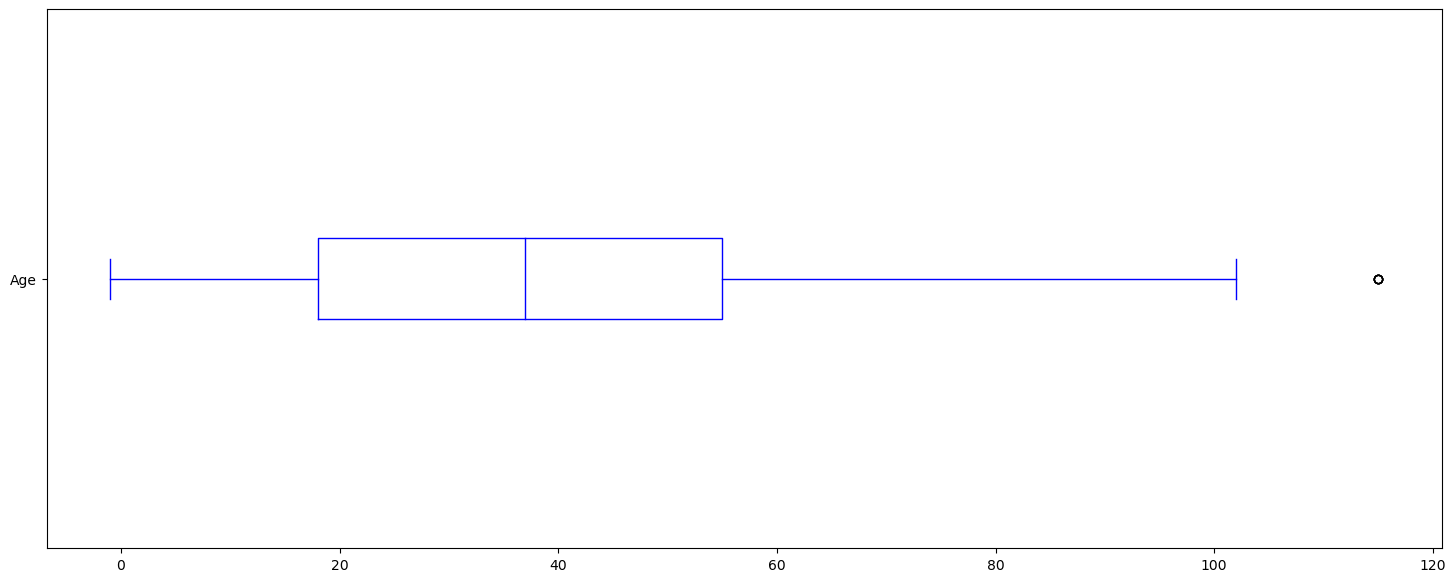

In [22]:
# view box-and-whisker plot horizontally to get a visual idea of range and where outliers are WRT to range
df.Age.plot(kind='box', figsize=(18,7), color='blue', vert=False)

The technical definition of an outlier is the __mean(average) of the variable + or - (3  * standard deviation).__ In the cell below we will mathematically find the outlier limits and compare with the horizontal box-and-whiskers plot above.

In [23]:
print("Highest Age w/o being outlier", df.Age.mean() + 3 * df.Age.std())
print("Lowest Age w/o being outlier", df.Age.mean() - 3* df.Age.std())

Highest Age w/o being outlier 106.36510184738236
Lowest Age w/o being outlier -32.22428537287001


In [24]:
age_rows_to_drop_df = df.loc[(df['Age'] < 0)  | (df['Age'] >= 100)]
age_rows_to_drop_df

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
58014,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,0,0,0,0,0,0,0,-1,1
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,0,0,0,0,1,0,1,2,3
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,0,0,0,0,1,0,1,2,3
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,0,0,0,0,1,0,1,37,0
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,0,0,0,0,1,0,0,-1,0
79270,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,0,0,0,0,1,0,0,0,1
79272,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,0,0,0,0,1,0,0,0,1
90372,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,0,0,0,0,0,0,0,1,3
92084,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,0,0,0,0,0,1,0,27,4
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,0,1,0,0,0,1,0,14,4


In [25]:
# visually inspect the non-null count to see how many total rows we are dropping so it can be checked <--- 12 rows
age_rows_to_drop_df.info()
num_of_rows_dropped = age_rows_to_drop_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 58014 to 108506
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          12 non-null     object             
 1   ScheduledDay    12 non-null     datetime64[ns, UTC]
 2   AppointmentDay  12 non-null     datetime64[ns, UTC]
 3   Age             12 non-null     int64              
 4   Scholarship     12 non-null     int64              
 5   Hipertension    12 non-null     int64              
 6   Diabetes        12 non-null     int64              
 7   Alcoholism      12 non-null     int64              
 8   Handicap        12 non-null     int64              
 9   SMS_received    12 non-null     int64              
 10  No-show         12 non-null     int64              
 11  Days_Between    12 non-null     int64              
 12  Day_Num         12 non-null     int64              
dtypes: datetime64[ns, UTC](2), in

As mentioned earlier, we did see a minimum value in the Age column of -1, and we can see here that the lowest value for Age that is allowed without being an outlier is -32.24. __Now, logically we know that a person cannot be or have negative years. For that reason we will drop any rows with an age value less than 0 as that is not physically possible.__ But, as fate would have it, there is only 1 row with a value less than 0 which would lead this analyst to believe a typo was made, but the row must still be removed.

It is visible in the data frame in the cell above that there are values above the outlier threshold of 106. There are 5 age values of 115 which would corroborate the horizontal box-and-whiskers plot that shows an outlier at 1 value location, 115. In this case there happens to be 5 rows that contain that value. __This investigation will cap the maximum age at a value of 99 years.__ This is an executive decision as there are only 11 rows with values in the Age column of 100 or greater. While 106 years old is the threshold for an outlier value, by capping the maximum value at 99 it will be easier to create logical age bins that can be used throughout the investigation, as will be illustrated later, with practically no information/data loss from the original dataset. 

__In total 12 rows will be dropped either as legitimate outliers (_1 row_ with -1 value and _5 rows_ with value of 115) or part of the executive choice to cap the investigation at 99 years (6 rows with age values between 100 and 102, inclusive).__

In [26]:
df = df.loc[(df['Age'] >= 0) & (df['Age'] <= 99)]
num_rows_after_drop = df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110316 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110316 non-null  object             
 1   ScheduledDay    110316 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110316 non-null  datetime64[ns, UTC]
 3   Age             110316 non-null  int64              
 4   Scholarship     110316 non-null  int64              
 5   Hipertension    110316 non-null  int64              
 6   Diabetes        110316 non-null  int64              
 7   Alcoholism      110316 non-null  int64              
 8   Handicap        110316 non-null  int64              
 9   SMS_received    110316 non-null  int64              
 10  No-show         110316 non-null  int64              
 11  Days_Between    110316 non-null  int64              
 12  Day_Num         110316 non-null  int64              
dtypes: datetime64[

In [27]:
## rows in the new filtered df(110316) + number of rows dropped(12) == total rows after handicap invalid rows dropped---> 110328
# see cell #23 output re value of 110328
110328 == num_rows_after_drop + num_of_rows_dropped 

True

# DAYS BETWEEN SECTION

## When the 'Days_Between' and 'Day_Num' columns were created and visually inspected above, it was noted after the output in cell 15 that the minimum value of the 'Days_Between' column was -7. While there are scenarios where a negative value as a result of date-type data-mathematics yields valuable data, this is not one of those. A doctors appointment cannot have occured 7 days before it was scheduled (unless it was retroactively added and whether that did or did not occur is outside the scope of this analysis). The next few cells will investigate any values less than or equal to 0 as well as search for outliers as the 'Days_Between' column is a continuous range of integers. 

<AxesSubplot:>

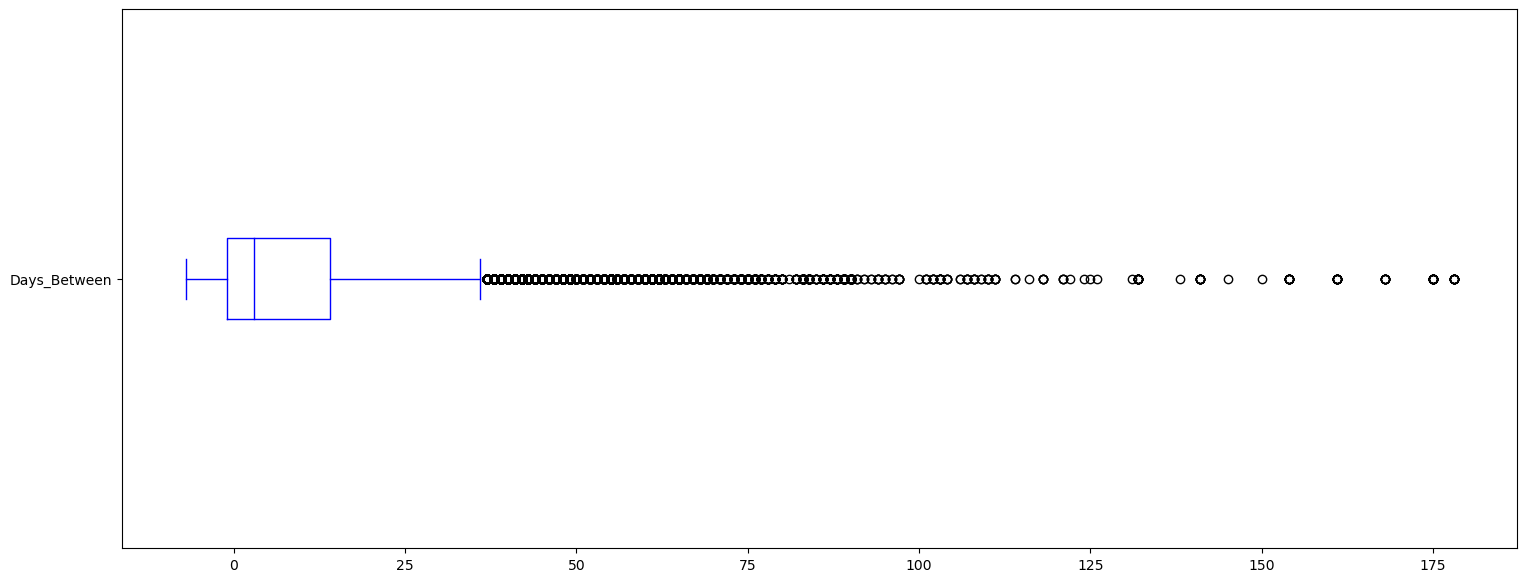

In [28]:
# view box-and-whisker plot horizontally to get a visual idea of range and where outliers are WRT to range
df.Days_Between.plot(kind='box', figsize=(18,7), color='blue', vert=False)

In [29]:
print("Highest Days_Between w/o being outlier", df.Days_Between.mean() + 3 * df.Days_Between.std())
print("Lowest Days_Between w/o being outlier", df.Days_Between.mean() - 3* df.Days_Between.std())

Highest Days_Between w/o being outlier 54.96134785716308
Lowest Days_Between w/o being outlier -36.587258876416854


<AxesSubplot:ylabel='Frequency'>

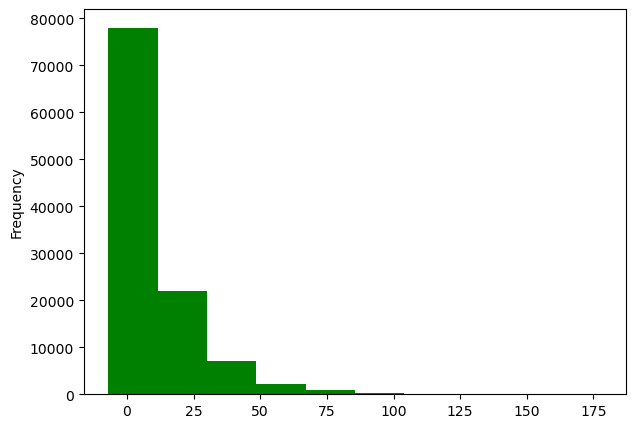

In [30]:
df.Days_Between.plot(kind='hist', figsize=(7,5), color='green')

## It is visible from the box-and-whiskers plot and the historgram above that a substantial percentage of values are, for lack of a better term, crowded all around 0 on the x axis. It seems prudent to investigate why so many values are clustered together like this. 

In [31]:
# create temporary df with all rows with values of Days_Between less than or equal to (<= 1)
# this df will be used to get a count of all outliers, same-day appointments, or rows that have a value of 1 for 'Days_Between' 
# as 1 is a value very close to zero and the graphs suggest a big group of values might be there that need consideration

one_or_less_days_between_df = df.loc[(df.Days_Between <= 1)]

#inspect newly filtered/created df
one_or_less_days_between_df.sample(15)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
76618,M,2016-05-02 07:10:29+00:00,2016-05-02 00:00:00+00:00,0,0,0,0,0,0,0,0,-1,0
54892,M,2016-05-06 14:21:45+00:00,2016-05-06 00:00:00+00:00,44,0,0,0,0,0,0,0,-1,4
42882,M,2016-05-04 09:18:48+00:00,2016-05-04 00:00:00+00:00,13,0,0,0,0,0,0,0,-1,2
16069,F,2016-05-25 13:56:53+00:00,2016-05-25 00:00:00+00:00,49,0,0,0,0,0,0,0,-1,2
19132,M,2016-05-17 14:32:06+00:00,2016-05-18 00:00:00+00:00,0,0,0,0,0,0,0,1,0,2
38191,M,2016-05-25 10:12:16+00:00,2016-05-25 00:00:00+00:00,52,0,0,0,0,0,0,0,-1,2
18155,M,2016-05-12 09:35:20+00:00,2016-05-12 00:00:00+00:00,48,0,0,0,0,0,0,0,-1,3
73573,M,2016-05-03 16:40:43+00:00,2016-05-03 00:00:00+00:00,34,0,0,0,0,0,0,0,-1,1
95329,M,2016-06-08 10:39:44+00:00,2016-06-08 00:00:00+00:00,9,0,0,0,0,0,0,0,-1,2
75524,M,2016-05-11 09:52:58+00:00,2016-05-11 00:00:00+00:00,56,0,0,0,0,0,0,0,-1,2


In [32]:
# check to see if any of the rows with values <= 1 received an SMS reminder 
one_or_less_days_between_df.loc[(one_or_less_days_between_df.SMS_received == 1)]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num


# To consolidate the output of the 2 cells above and can be gleaned from these rows:
- __ALL ROWS WITH A VALUE 1 OR LESS (TO THE MINIMUM VAL OF -7) ALSO DID NOT RECEIVE SMS REMINDERS FOR THEIR APPOINTMENTS.__
- Rows with __values of -1__ for the 'Days_Between' column contain appointments that were scheduled for the same day.
- Rows with __values of 0__ for the 'Days_Between' column contain appointments that were scheduled for the next day __BUT less than 24 hours later.__
- Rows with __values of 1__ for the 'Days_Between' column contain appointments scheduled for the next physical day __BUT more than 24 hours later and less than midnight of the following day.__
-  As mentioned above, the min value of the 'Days_Between' column is -7. Given what we know about the values -1,0, and 1, we can assume the values that can be between -2 (as we understand and have an understanding for -1,0, and 1) and -7 (the minimum value we obtained from __.describe()__ earlier) are outliers and can be dropped. 


## DROP DAYS_BETWEEN OUTLIERS W/ VALS LESS THAN -1

In [33]:
# isolate rows with 'Days_Between' values less than -1 
less_than_negative_one_df = one_or_less_days_between_df.loc[(one_or_less_days_between_df.Days_Between < -1)]

#visually inspect filtered rows
less_than_negative_one_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,0,0,0,0,1,0,1,-2,0
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,0,0,0,0,1,0,1,-2,1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,0,0,0,0,0,0,1,-2,2
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,0,0,0,0,0,0,1,-7,3
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,0,0,0,0,0,0,1,-2,1


In [34]:
# see how many rows exist with values less than -1 in the 'Days_Between' columns
less_than_negative_one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 27033 to 72362
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          5 non-null      object             
 1   ScheduledDay    5 non-null      datetime64[ns, UTC]
 2   AppointmentDay  5 non-null      datetime64[ns, UTC]
 3   Age             5 non-null      int64              
 4   Scholarship     5 non-null      int64              
 5   Hipertension    5 non-null      int64              
 6   Diabetes        5 non-null      int64              
 7   Alcoholism      5 non-null      int64              
 8   Handicap        5 non-null      int64              
 9   SMS_received    5 non-null      int64              
 10  No-show         5 non-null      int64              
 11  Days_Between    5 non-null      int64              
 12  Day_Num         5 non-null      int64              
dtypes: datetime64[ns, UTC](2), int6

In [35]:
# drop outlier/typo rows with invalid values in 'Days_Between' column
# -----> NOTE WE ARE DROPPING/FILTERING ROWS FROM ORIGINAL 'df' <---------

df = df.loc[(df.Days_Between >= -1)]

# check to ensure that 5 rows have been removed 
# 110316 - 5 ----> 110311
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110311 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110311 non-null  object             
 1   ScheduledDay    110311 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110311 non-null  datetime64[ns, UTC]
 3   Age             110311 non-null  int64              
 4   Scholarship     110311 non-null  int64              
 5   Hipertension    110311 non-null  int64              
 6   Diabetes        110311 non-null  int64              
 7   Alcoholism      110311 non-null  int64              
 8   Handicap        110311 non-null  int64              
 9   SMS_received    110311 non-null  int64              
 10  No-show         110311 non-null  int64              
 11  Days_Between    110311 non-null  int64              
 12  Day_Num         110311 non-null  int64              
dtypes: datetime64[

# ALL CODE AND LOGIC CHECKED AND VALID UP TO THIS POINT

Now that the logic for same-day appointments and appointments scheduled for the same day and removed all actual outlier values, now it is time to turn our attention to the possible outliers at the other end of the spectrum. As shown above from the graphs a few cells above, the upper bound for outliers in the 'Days_Between' column is 55 days (cell __##__).

An executive decision has been made to include any values above the outlier threshold of 55 days but below 90 days (inclusive). The logic behind this decision is 90 days (3 months) is a logical cutoff point. 3 months/90 days is a common time frame to schedule follow-up appointments and thus any rows with a value of 90 or less will be included even though the mathematical threshold, determined by taking the mean value of the 'Days_Between' column and adding 3 times the value of the standard deviation, would suggest removing rows with a value above 55 or higher. 

In [36]:
temp_df = df.loc[(df.Days_Between > 90)]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 953 to 110351
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          161 non-null    object             
 1   ScheduledDay    161 non-null    datetime64[ns, UTC]
 2   AppointmentDay  161 non-null    datetime64[ns, UTC]
 3   Age             161 non-null    int64              
 4   Scholarship     161 non-null    int64              
 5   Hipertension    161 non-null    int64              
 6   Diabetes        161 non-null    int64              
 7   Alcoholism      161 non-null    int64              
 8   Handicap        161 non-null    int64              
 9   SMS_received    161 non-null    int64              
 10  No-show         161 non-null    int64              
 11  Days_Between    161 non-null    int64              
 12  Day_Num         161 non-null    int64              
dtypes: datetime64[ns, UTC](2), int

As seen in the cell above, there are only 161 rows with values greater than 90 in the entire data set. We can remove this actual outliers with confidence that the results of our investigation will not be skewed by their removal or the logic of focusing on a specific, logical time-frame. 

In [37]:
## NOTE---> WE ARE DROPPING/FILTERING THE ROWS OUT FROM THE ORIGINAL 'df' 

df = df.loc[(df.Days_Between <= 90)]

# inspect newly filtered df to ensure that exactly 161 rows (see above) have been removed
# 110311 - 161 ----> 110150
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110150 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110150 non-null  object             
 1   ScheduledDay    110150 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110150 non-null  datetime64[ns, UTC]
 3   Age             110150 non-null  int64              
 4   Scholarship     110150 non-null  int64              
 5   Hipertension    110150 non-null  int64              
 6   Diabetes        110150 non-null  int64              
 7   Alcoholism      110150 non-null  int64              
 8   Handicap        110150 non-null  int64              
 9   SMS_received    110150 non-null  int64              
 10  No-show         110150 non-null  int64              
 11  Days_Between    110150 non-null  int64              
 12  Day_Num         110150 non-null  int64              
dtypes: datetime64[

The output of the code cell below will show that all outlier rows have been removed by seaching for rows that have invalid values for the columns that have been cleaned above and are recapped below:
- __Days_Between column DOES NOT have any values greater than 90.__
- __Days_Between column DOES NOT have any values less than -1.__
- __Age column DOES NOT have any values less than 0.__
- __Age column DOES NOT have any values greater than 90.__
- __Handicap values other than 0 or 1 have been removed.__

In [38]:
df.loc[(df.Days_Between > 90) | (df.Days_Between < -1) | (df.Age < 0) | (df.Age > 99) | (df.Handicap > 1) | df.Handicap < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num


# As the purpose of this investigation is to obtain diagnositic and descriptive statistics of the newly rolled out SMS/Text Reminder Program, the same-day appointments that ALL did not receive an SMS reminder will be separated.


# This will be done in the cell(s) below and using the condition of 'Days_Between' <= 1 as condition to split the data set into 2 new data frames, one with ALL same-day appointments and no SMS reminder and one with ALL non-same day appointments that are eligible to receive SMS/Text reminders. 

In [39]:
df.info()
total_num_clean_rows = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110150 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110150 non-null  object             
 1   ScheduledDay    110150 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110150 non-null  datetime64[ns, UTC]
 3   Age             110150 non-null  int64              
 4   Scholarship     110150 non-null  int64              
 5   Hipertension    110150 non-null  int64              
 6   Diabetes        110150 non-null  int64              
 7   Alcoholism      110150 non-null  int64              
 8   Handicap        110150 non-null  int64              
 9   SMS_received    110150 non-null  int64              
 10  No-show         110150 non-null  int64              
 11  Days_Between    110150 non-null  int64              
 12  Day_Num         110150 non-null  int64              
dtypes: datetime64[

In [40]:
same_day_appointments_clean_df = df.loc[(df.Days_Between <= 1)]
num_same_day_appointments_from_df = same_day_appointments_clean_df.shape[0]
same_day_appointments_clean_df.sample(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
33733,F,2016-05-04 11:26:23+00:00,2016-05-06 00:00:00+00:00,49,0,0,0,1,0,0,0,1,4
53703,M,2016-05-19 08:03:18+00:00,2016-05-19 00:00:00+00:00,5,0,0,0,0,0,0,0,-1,3
773,F,2016-04-27 15:00:54+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,1,4
29055,F,2016-05-10 15:53:43+00:00,2016-05-12 00:00:00+00:00,27,0,0,0,0,0,0,0,1,3
38081,F,2016-05-30 08:25:18+00:00,2016-05-30 00:00:00+00:00,64,0,1,0,0,0,0,0,-1,0
100085,F,2016-06-02 07:43:56+00:00,2016-06-02 00:00:00+00:00,23,1,0,0,0,0,0,0,-1,3
94057,F,2016-05-31 08:52:56+00:00,2016-06-01 00:00:00+00:00,64,0,1,0,0,0,0,0,0,2
4885,F,2016-05-11 07:14:21+00:00,2016-05-13 00:00:00+00:00,77,0,1,0,0,0,0,0,1,4
8710,M,2016-05-30 10:09:51+00:00,2016-05-30 00:00:00+00:00,49,0,0,0,0,0,0,0,-1,0
89935,F,2016-05-31 07:22:02+00:00,2016-06-02 00:00:00+00:00,26,0,1,1,0,0,0,0,1,3


In [41]:
# ensure ALL rows present in this clean df DID NOT receive SMS reminder
same_day_appointments_clean_df.loc[(same_day_appointments_clean_df.SMS_received == 1)]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num


# Although the same-day appointments that ALL did not recieve SMS/Text reminders are not useful in this particular investigation they may be useful as new questions arise in this and other investigations. For this reason this data will be saved to a csv file where it may be used later. Rather have it an not need it than need it and not have it.

In [42]:
sms_reminder_eligible_clean_df = df.loc[(df.Days_Between > 1)]
num_text_reminder_eligible_from_df = sms_reminder_eligible_clean_df.shape[0]
sms_reminder_eligible_clean_df.sample(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
4914,F,2016-04-28 16:00:32+00:00,2016-05-02 00:00:00+00:00,60,0,0,0,0,0,1,1,3,0
84337,F,2016-05-18 11:19:21+00:00,2016-06-06 00:00:00+00:00,72,0,1,0,0,0,0,0,18,0
28106,F,2016-05-12 09:45:14+00:00,2016-05-30 00:00:00+00:00,23,0,0,0,0,0,1,0,17,0
5578,F,2016-04-26 07:58:50+00:00,2016-05-05 00:00:00+00:00,11,0,0,0,0,0,1,0,8,3
872,F,2016-04-11 09:27:05+00:00,2016-04-29 00:00:00+00:00,52,0,1,0,0,0,1,0,17,4
73509,F,2016-05-02 11:16:55+00:00,2016-05-10 00:00:00+00:00,49,0,0,0,0,0,1,1,7,1
40906,F,2016-05-03 08:47:25+00:00,2016-05-17 00:00:00+00:00,75,0,0,0,0,0,0,0,13,1
47772,F,2016-04-28 14:47:04+00:00,2016-05-11 00:00:00+00:00,51,0,1,0,0,0,1,0,12,2
3719,M,2016-04-19 09:27:20+00:00,2016-05-25 00:00:00+00:00,8,0,0,0,0,0,1,0,35,2
18004,F,2016-05-11 07:57:13+00:00,2016-05-25 00:00:00+00:00,43,0,0,0,0,0,1,0,13,2


In [43]:
# the output should be True as the sum of both these dfs should equal the amount of rows from the df they were both split from
total_num_clean_rows == num_same_day_appointments_from_df + num_text_reminder_eligible_from_df

True

In [44]:
# inspect df structure and save to csv to be used in analysis
# saving the same_day appointments to the general project folder as no further analysis will be done on this data
same_day_appointments_clean_df.info()
same_day_appointments_clean_df.to_csv(os.path.join('../','same_day_scheduled_clean.csv'), index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50396 entries, 0 to 110517
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          50396 non-null  object             
 1   ScheduledDay    50396 non-null  datetime64[ns, UTC]
 2   AppointmentDay  50396 non-null  datetime64[ns, UTC]
 3   Age             50396 non-null  int64              
 4   Scholarship     50396 non-null  int64              
 5   Hipertension    50396 non-null  int64              
 6   Diabetes        50396 non-null  int64              
 7   Alcoholism      50396 non-null  int64              
 8   Handicap        50396 non-null  int64              
 9   SMS_received    50396 non-null  int64              
 10  No-show         50396 non-null  int64              
 11  Days_Between    50396 non-null  int64              
 12  Day_Num         50396 non-null  int64              
dtypes: datetime64[ns, UTC](2), int

In [45]:
# saving the csv to a new folder inside the main project folder
sms_reminder_eligible_clean_df.info()
sms_reminder_eligible_clean_df.to_csv(os.path.join('../SMS_Eligible_ALL_ROWS', 'sms_reminder_eligible_clean.csv'), index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59754 entries, 11 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          59754 non-null  object             
 1   ScheduledDay    59754 non-null  datetime64[ns, UTC]
 2   AppointmentDay  59754 non-null  datetime64[ns, UTC]
 3   Age             59754 non-null  int64              
 4   Scholarship     59754 non-null  int64              
 5   Hipertension    59754 non-null  int64              
 6   Diabetes        59754 non-null  int64              
 7   Alcoholism      59754 non-null  int64              
 8   Handicap        59754 non-null  int64              
 9   SMS_received    59754 non-null  int64              
 10  No-show         59754 non-null  int64              
 11  Days_Between    59754 non-null  int64              
 12  Day_Num         59754 non-null  int64              
dtypes: datetime64[ns, UTC](2), in

# This concludes the cleaning and wrangling section of this investigation. The investigation will continue in different notebooks to analyze the 2 new DFs created in this notebook.